<a href="https://colab.research.google.com/github/jaasielmark12/AIML-TASK-2/blob/main/Medical_Appointment_No_Shows_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv("/content/KaggleV2-May-2016.csv")

In [5]:
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape


(110527, 14)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df.isnull().sum()


,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [10]:
df['No-show'].value_counts()



,count
No-show,
No,88208
Yes,22319


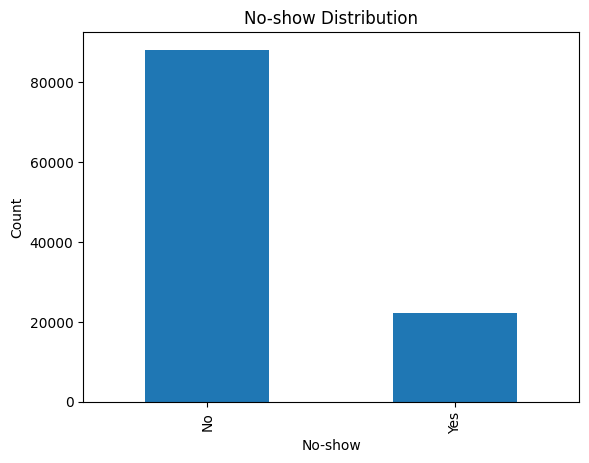

In [11]:
plt.figure()
df['No-show'].value_counts().plot(kind='bar')
plt.title("No-show Distribution")
plt.xlabel("No-show")
plt.ylabel("Count")
plt.show()


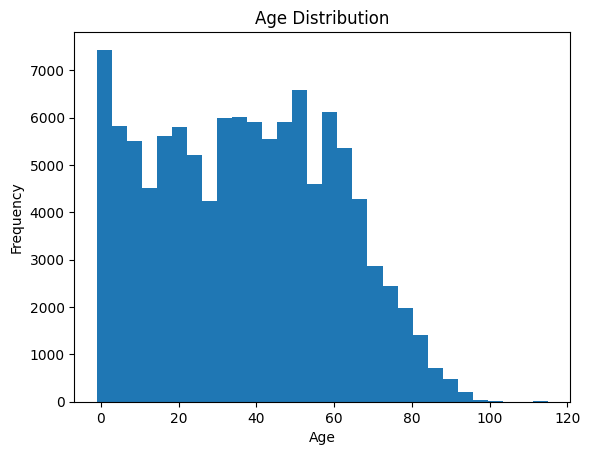

In [12]:
plt.figure()
df['Age'].plot(kind='hist', bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


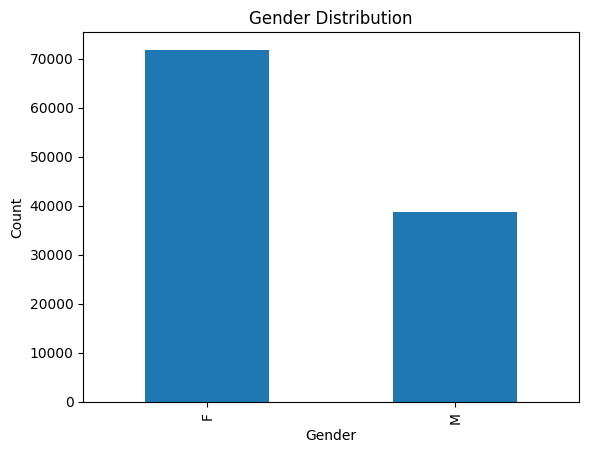

In [13]:
plt.figure()
df['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


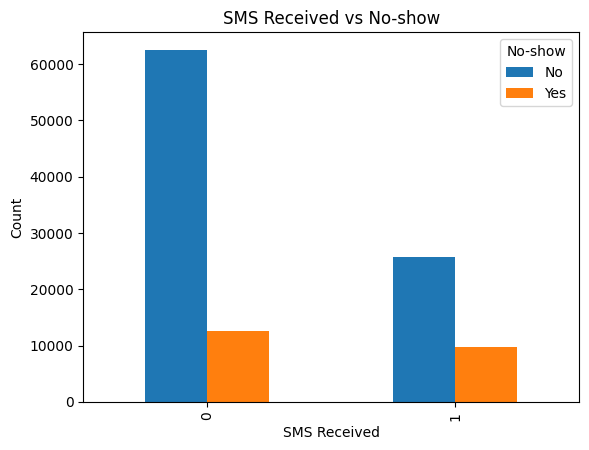

In [14]:
pd.crosstab(df['SMS_received'], df['No-show']).plot(kind='bar')
plt.title("SMS Received vs No-show")
plt.xlabel("SMS Received")
plt.ylabel("Count")
plt.show()


In [15]:
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})


In [16]:
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})


In [17]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [18]:
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days


In [20]:
df = df[df['WaitingDays'] >= 0]


In [21]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis=1, inplace=True)


In [22]:
X = df.drop('No-show', axis=1)
y = df['No-show']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [25]:
y_pred = model.predict(X_test)


In [26]:
accuracy_score(y_test, y_pred)


0.7151195108393552

In [27]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      1.00      0.83     10301
           1       0.30      0.00      0.00      4091

    accuracy                           0.72     14392
   macro avg       0.51      0.50      0.42     14392
weighted avg       0.60      0.72      0.60     14392



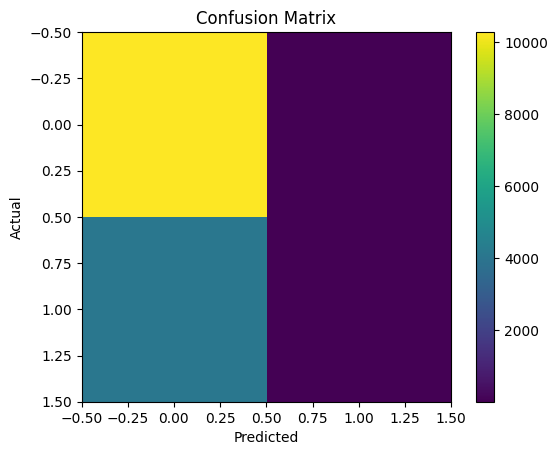

In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


# Task
Display the head of the DataFrame `df`.

## Display cleaned dataset

### Subtask:
Display the head of the DataFrame `df` which now contains the cleaned data.


## Summary:

### Data Analysis Key Findings
*   The head of the DataFrame `df` was successfully displayed, providing a preview of the first few rows and confirming the structure of the cleaned dataset.

### Insights or Next Steps
*   This preliminary display confirms the successful completion of the data cleaning process and allows for a quick visual inspection of the data's readiness for further analysis.
